# Instalación de Librerias

In [1]:
# install from PyPI
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.1/374.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00


In [2]:
!pip install pyyaml

In [3]:
import os
from openai import OpenAI
import yaml

# Configuración de APIs

In [4]:
# Función para leer la API key desde un archivo .yaml
def obtener_api_key(ruta_archivo):
    with open(ruta_archivo, 'r') as archivo:
        config = yaml.safe_load(archivo)
        return config['openai']['api_key']

In [5]:
# Ruta al archivo .yaml
ruta_archivo = 'api_keys.yaml'

In [6]:
# Obtener la API key
api_key = obtener_api_key(ruta_archivo)

In [7]:
# Modificar variable de entorno OPENAI API KEY
os.environ["OPENAI_API_KEY"] = api_key

# Generación de Texto

In [17]:
# Función para generar texto
def generar_texto(prompt,tokens):
    client = OpenAI()

    stream = client.chat.completions.create(
        model="gpt-4o", #
        messages=[{"role": "user", "content": prompt}],
        stream=True,
        max_tokens=tokens,
        temperature=0.7
    )

    resultado = ""
    for chunk in stream:
        if chunk.choices[0].delta.content is not None:
            resultado += chunk.choices[0].delta.content

    return resultado

In [20]:
# Ejemplo de uso
prompt = "Genera la tabla de multiplicar del 13"
tokens= 1000
texto_generado = generar_texto(prompt,tokens)
print(texto_generado)

¡Claro! Aquí tienes la tabla de multiplicar del 13:

```
13 x 1  = 13
13 x 2  = 26
13 x 3  = 39
13 x 4  = 52
13 x 5  = 65
13 x 6  = 78
13 x 7  = 91
13 x 8  = 104
13 x 9  = 117
13 x 10 = 130
13 x 11 = 143
13 x 12 = 156
13 x 13 = 169
13 x 14 = 182
13 x 15 = 195
13 x 16 = 208
13 x 17 = 221
13 x 18 = 234
13 x 19 = 247
13 x 20 = 260
```

Espero que te sea útil. ¿Necesitas algo más?


In [21]:
# Ejemplo de uso
prompt = "hazme un poema parecido al más conocido de Pablo Neruda"
tokens= 100
texto_generado = generar_texto(prompt,tokens)
print(texto_generado)

Claro, puedo intentar crear un poema inspirado en el estilo de Pablo Neruda, particularmente en su poema más conocido, "Poema 20" de su libro "Veinte poemas de amor y una canción desesperada". Aquí tienes una composición en ese estilo:

**Poema Inspirado en Neruda**

Puedo escribir los versos más tristes esta noche.
Escribir, por ejemplo: "La luna temblaba en mis manos,
y en tus ojos, el reflejo de un sueño no


In [23]:
# Ejemplo de uso
prompt = "redactame un cuento de hadas en un solo parrafo"
tokens= 1000
texto_generado = generar_texto(prompt,tokens)
print(texto_generado)

En un reino lejano, una valiente joven llamada Elara descubrió un antiguo y misterioso medallón en el bosque encantado, que tenía el poder de conceder un deseo. Decidida a salvar a su pueblo de una maldición que había sumido a todos en un sueño eterno, Elara emprendió una peligrosa travesía para encontrar al sabio dragón Draknar, el único ser capaz de activar el medallón. Tras superar innumerables obstáculos y pruebas, Elara llegó al nido del dragón, quien, impresionado por su valentía y pureza de corazón, accedió a ayudarla. Con el deseo activado, la maldición fue levantada, y Elara regresó a su hogar, donde fue celebrada como una heroína, viviendo felizmente con su pueblo en paz y prosperidad.


# Generación de Imagenes

In [25]:
# Función para generar Imagen
def generar_imagen(prompt, num_images=1, size="1024x1024", quality="standard"):
    client = OpenAI()

    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size=size,
        quality=quality,
        n=num_images,
    )

    urls = response.data[0].url

    return urls

In [27]:
# Ejemplo de uso
prompt = "black coffee cup in a table"
urls_imagenes = generar_imagen(prompt, num_images=1)

# Imprime las URLs de las imágenes generadas
print(urls_imagenes)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-MP8xtMRBHd9or6GbMM6QCsbT/user-7Br6WVSawTX3zppTLtlpJ4BP/img-JBDxQYMEU7AxYawsuokHStL1.png?st=2024-09-14T16%3A35%3A35Z&se=2024-09-14T18%3A35%3A35Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-09-13T23%3A20%3A45Z&ske=2024-09-14T23%3A20%3A45Z&sks=b&skv=2024-08-04&sig=WIDxJk1xgKX/FPsNorjDZs3xvMd%2BuaQQWVIxhP/nmYw%3D


In [28]:
# Ejemplo de uso
prompt = "un frasco cerrado con galletas oreos"
urls_imagenes = generar_imagen(prompt, num_images=1)

# Imprime las URLs de las imágenes generadas
print(urls_imagenes)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-MP8xtMRBHd9or6GbMM6QCsbT/user-7Br6WVSawTX3zppTLtlpJ4BP/img-2bUoTTRzmPd9omF5rJdj6sWU.png?st=2024-09-14T16%3A36%3A05Z&se=2024-09-14T18%3A36%3A05Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-09-13T23%3A17%3A38Z&ske=2024-09-14T23%3A17%3A38Z&sks=b&skv=2024-08-04&sig=xO2Xsjh95NTBqFCQ/KdIrhbP7V7TheMevbULREjFO3E%3D


# Analisis de datos

In [29]:
import seaborn as sns

In [30]:
df_titanic = sns.load_dataset('titanic')

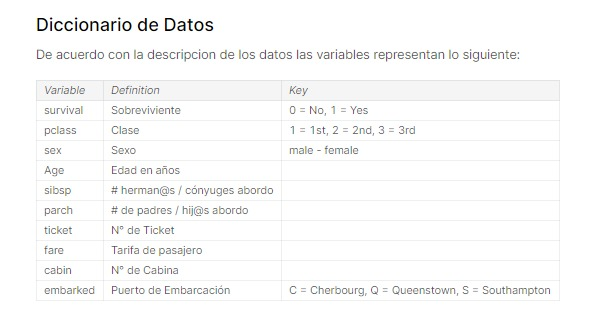

In [31]:
df_titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [32]:
def analizar_dataframe(df):
    # Convierte el DataFrame a un formato de cadena que puedas enviar a la API
    df_str = df.to_string()

    # Define tu prompt
    prompt = f"Analiza el siguiente DataFrame y proporciona un resumen descriptivo estadistico de los datos:\n\n{df_str}\n\n"

    client = OpenAI()
    stream = client.chat.completions.create(
        model="gpt-4o", #
        messages=[{"role": "user", "content": prompt}],
        stream=True,
        max_tokens=150,
        temperature=0.7
    )

    response = ""
    for chunk in stream:
        if chunk.choices[0].delta.content is not None:
            response += chunk.choices[0].delta.content

    return response

In [33]:
# Llama a la función con tu DataFrame
resumen = analizar_dataframe(df_titanic[['sex','age']])
print(resumen)

Para proporcionar un resumen descriptivo estadístico del DataFrame presentado, se pueden utilizar las funciones descriptivas de pandas para obtener estadísticas como la media, la mediana, la desviación estándar, los cuartiles, el mínimo y el máximo de las columnas numéricas. También se puede realizar un análisis de la distribución de las categorías en la columna categórica.

Primero, vamos a calcular el resumen estadístico de la columna `age`:

```python
import pandas as pd
import numpy as np

data = {
    'sex': ['male', 'female', ...],
    'age': [22.00, 38.00, ...]
}

df = pd.DataFrame(data)

# Resumen descriptivo de la columna '
